# Numerical Methods 1
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott), [Nicolas Barral](http://www.imperial.ac.uk/people/n.barral)

# Lecture 1: Interpolation and curve fitting

## Learning objectives:

* Learn about standard methods to approximate discrete data points.
* Differences with curve fitting of noisy data.
* Implement methods to compute simple polynomial interpolation.

# Introduction

## Interpolation vs curve-fitting

Consider a discrete set of data points 

$$ (x_i, y_i),\quad i=0,\ldots,N,$$

and that we wish to approximate this data in some sense. The data may be known to be exact (if we wished to approximate a complex function by a simpler expression say), or it may have errors from measurement or observational techniques with known or unknown error bars.

### Interpolation
Interpolation assumes that these data points are exact (e.g. no measurement errors) and at distinct $x$ locations. It aims to fit a function (or curve), $y=f(x)$, to this data which exactly passes through the $N+1$ discrete points. This means that we have the additional constraint on the $x_s$'s that
$$x_0 < x_1 < \ldots < x_N,$$ 
and that 
$$y_i=f(x_i),\quad \forall i.$$

In this case the function $f$ is known as the *interpolating function*, or simply the *interpolant*.

### Curve-fitting
Alternatively, when we have data with noise, or multiple different measurement values ($y$) at a given $x$ then we cannot fit a function/curve that goes through all points exactly, and rather have to perform **curve-fitting** - finding a function that approximates the data in some sense but does not necessarily hit all points. In this case we no longer have the requirement that 
$$x_0 < x_1 < \ldots < x_N$$ 
and can consider the data simply as a *cloud of points*. This is the most typical case for real world data which contains variability and noise giving rise to multiple different measurements (i.e. $y$ values) at the same $x$ location.

An example of interpolation would be to simply fit a line between every successive two data points - this is a piecewise-linear (an example of the more general piecewise-polynomial) interpolation.

If we were to construct a single straight line ($y=mx+c$ where we have only two free parameters $m$ and $c$) that, for example, minimised that sum of the squares of the differences to the data, this would be what is known as a *least squares approximation* to the data using a linear function. In real data this fitting of data to a function has the effect of *smoothing* complex or noisy data.

### Choice of interpolating function

We have a lot of choice for how we construct the interpolating or curve-fitting function. Considerations for how to do this include the smoothness of the resulting function (i.e. how many smooth derivatives it has - cf. the piecewise polynomial case - what does this approximation tell us about the rate of change of the data?), replicating known positivity or periodicity, the cost of evaluating it, etc.

Some choices include: polynomials, piecewise polynomials, trigonometric series (sums of sines and cosines leading to an approximation similar to Fourier series).


# Lagrange polynomial

[Lagrange polynomials](http://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html) are a particularly popular choice for constructing an interpolant for a given data set. The Lagrange polynomial is the polynomial of the least degree that passes through each data point in the set. **The interpolating polynomial of the least degree is unique.**

Given a set of points as defined above, the Lagrange polynomial is defined as the linear combination

$$L(x) = \sum_{i=0}^{N} y_i \ell_i(x).$$

The functions $\ell_i$ are known as the *Lagrange basis polynomials* defined by the product

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$

where $0\le i\le N$.

Notice from the definition the requirement that no two $x_i$ are the same, $x_i - x_m \neq 0$, so this expression is always well-defined (i.e. we never get a divide by zero!) The reason pairs $x_i = x_j$ with $y_i\neq y_j$ are not allowed is that no interpolation function $L$ such that $y_i = L(x_i)$ would exist; a function can only get one value for each argument $x_i$. On the other hand, if also $y_i = y_j$, then those two points would actually be one single point.

For all $i\neq j$, $\ell_j(x)$ includes the term $(x-x_i)$ in the numerator, so the whole product will be zero at $x=x_i$:

$\ell_{j\ne i}(x_i) = \prod_{m\neq j} \frac{x_i-x_m}{x_j-x_m} = \frac{(x_i-x_0)}{(x_j-x_0)} \cdots \frac{(x_i-x_i)}{(x_j-x_i)} \cdots \frac{(x_i-x_N)}{(x_j-x_N)} = 0$.

On the other hand,

$\ell_i(x_i) := \prod_{m\neq i} \frac{x_i-x_m}{x_i-x_m} = 1$

In other words, all basis polynomials are zero at $x=x_i$, except for $\ell_i(x)$, for which it holds that $\ell_i(x_i)=1$, because it lacks the $(x-x_i)$ term.

It follows that $y_i \ell_i(x_i)=y_i$, so at each point $x_i$, $L(x_i)=y_i+0+0+\dots +0=y_i$, showing that $L$ interpolates the function exactly.

To help illustrate our discussion lets first create some arbitrary data in Python and take a look at it.

Populating the interactive namespace from numpy and matplotlib


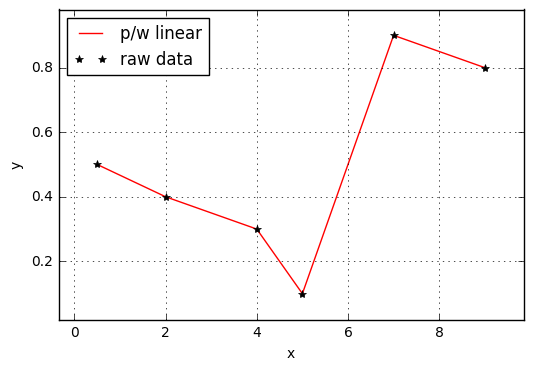

In [1]:
%pylab inline

# Invent some raw data 
x=numpy.array([0.5,2.0,4.0,5.0,7.0,9.0])
y=numpy.array([0.5,0.4,0.3,0.1,0.9,0.8])

# For clarity we are going to add a small margin to all the plots.
pylab.margins(0.1)

# We want to overlay a plot of the raw data a few times so lets make this a function.
def plot_raw_data(x,y):
    # Plot the data as black stars
    pylab.plot(x,y,'k*',label='raw data')
    pylab.xlabel('x')
    pylab.ylabel('y')
    pylab.grid(True)

# The simple plot function you used in Introduction to Programming last term
# will show a piecewise-linear approximation:
pylab.plot(x,y,'r',label='p/w linear')

# Overlay raw data
plot_raw_data(x,y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

We can use [scipy.interpolate.lagrange](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)
from [SciPy](http://www.scipy.org) to generate the **Lagrange polynomial** for a dataset as shown below.

<span style="color:red">(Note: SciPy provides a [wide range of interpolators](http://docs.scipy.org/doc/scipy/reference/interpolate.html) with many different properties which we do not have time to go into in this course. When you need to interpolate data for your specific application then you should look up the literature to ensure you are using the best one.)</span>

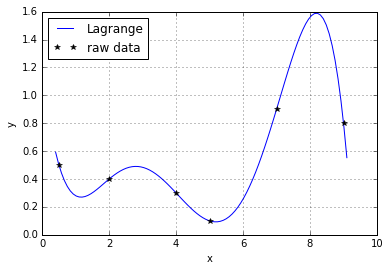

In [2]:
import scipy.interpolate

# Create the Lagrange polynomial for the given points.
lp=scipy.interpolate.lagrange(x, y)

# Evaluate this fuction at a high resolution so that we can get a smooth plot. 
xx=numpy.linspace(0.4, 9.1, 100)
pylab.plot(xx, lp(xx), 'b', label='Lagrange')

# Overlay raw data
plot_raw_data(x, y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

### <span style="color:blue">Exercise 1.1: The Lagrange basis polynomials evaluated at the data locations </span>

For a given $i$, what value does $\ell_i(x_j)$ takes for every value of $j$ (i.e. for each of the data points). <span style="color:green">Hint: Look again at the definition of basis polynomials.</span>

What is the mathematical name for the function $\ell_i(x)$?

### <span style="color:blue">Exercise 1.2: Picewise-linear Lagrange interpolant </span>

What are the Lagrange basis polynomials when $N=1$?

Evaluate by *pen and paper* the linear approximation $L_1(x)$ (i.e. the Lagrange polynomial of degree 1) which passes through the two points $(0.0,0.1),(1.0,0.9)$.

Notice that this method is just a glorified approach to obtain the equation of a line you are familar with: $y=mx+c$.

# Error in Lagrange interpolation

Note that it can be proven that in the case where we are interpolating a known function (e.g. a complex non-polynomial function) by a simpler polynomial, the error at any point is proportional to the distance of that point from any of the data points (which makes sense as the error is obviously zero at these points) and to the $(n+1)$-st derivative of that function evaluated at some location within the bounds of the data.  I.e. the more complex (sharply varying) the function is, the higher the error could be.


### <span style="color:blue">Exercise 1.3: Approximating a function </span>

Sample the function $y(x)=x^3$ at the points $x=(1,2,3)$.  

Write your own Python function to construct the Lagrange polynomials $L_0$ (the constant interpolant going through the $x=2$ data point only), $L_1$ (the linear interpolant going through the $x=1$ and $x=3$ points) and $L_2$ (the quadratic interpolant going through all three points). Plot the resulting polynomials along with the error compared to the original exact function. (<span style="color:green">Guru tip: Using the pylab function [fill_between](http://matplotlib.org/examples/pylab_examples/fill_between_demo.html) provides a nice way of illustrating the difference between graphs.</span>)

## Newton polynomial

Calculating the Newton polynomial (also called [Newtons divided difference interpolation polynomial](http://mathworld.wolfram.com/NewtonsDividedDifferenceInterpolationFormula.html)) yields the same polynomial the Lagrange polynomial method (remember that the polynomial of minimum degree to pass through each data point is unique), but are considered easier to implement.

The degree $N$ polynomial is now written in the form

$$ P_N(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + (x-x_0)(x-x_1)\ldots(x-x_N)a_N,$$

where $a_0, a_1, \ldots, a_N$ are our $N+1$ free parameters we need to find using the $N+1$ pieces of information we have in the given data.

Efficient implementation of algorithms follows from noticing that we can write this polynomial in a recursive form.  Consider for example $n=3$:

\begin{aligned}
P_3(x) &= a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + (x-x_0)(x-x_1)(x-x_2)a_3\\
&= a_0 +(x-x_0)[a_1 + (x-x_1)[a_2 + (x-x_2)a_3]].
\end{aligned}

Notice that substituting in the $x_i$ values leads to a set of simultaneous equations where we can easily evaluate the unknowns $a_0,a_1,\ldots$ using 'back (or forward) substitution':

1. Substitute $x=x_0$: We have $a_0 = P_3(x_0)$ which we know must be $y_0$.

2. Now substitute $x=x_1$: We have $P_3(x_1) = a_0 +(x_1-x_0)a_1$, the LHS of this is $y_1$, and we know everything on the RHS as we have already calculated $a_0 = y_0$: 
$$ a_1 = \frac{(y_1 - y_0)}{(x_1-x_0)}.$$
3. Substituting $x=x_2$ yields 
\begin{aligned}
& y_2 = P_3(x_2) = a_0 +(x_2-x_0)[a_1 + (x_2-x_1)a_2] = y_0 + (x_2-x_0)\left[ \frac{(y_1 - y_0)}{(x_1-x_0)} + (x_2-x_1)a_2\right]\\
&\implies a_2 = \frac{ \frac{(y_2 - y_0)}{(x_2-x_0)} - \frac{(y_1 - y_0)}{(x_1-x_0)}}{x_2-x_1}
\end{aligned}
4. and so on...


Introducing the *divided difference* notation

\begin{aligned}
\Delta y_i &= \frac{y_i-y_0}{x_i-x_0},\quad i=1,2,\ldots N\\
\Delta^2 y_i &= \frac{\Delta y_i-\Delta y_1}{x_i-x_1},\quad i=2,\ldots N\\
&\vdots\\
\Delta^n y_N &= \frac{\Delta^{N-1} y_N-\Delta^{N-1} y_{N-1}}{x_N-x_{N-1}}\\
\end{aligned}

The coefficients of the interpolating polynomial are in general terms

$$a_0=y_0,\quad a_1 = \Delta y_1, \quad a_2 = \Delta^2 y_2, \quad \ldots \quad a_N = \Delta^N y_N.$$


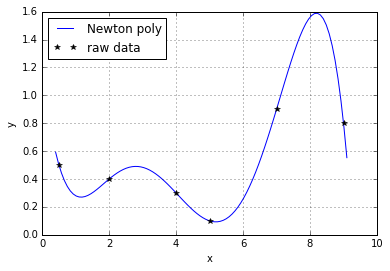

In [3]:
# consider the above example data again
x=numpy.array([0.5,2.0,4.0,5.0,7.0,9.0])
y=numpy.array([0.5,0.4,0.3,0.1,0.9,0.8])

# evaluate the coefficients a_i recursively using Newton's method
a=y.copy()
m=len(a)
for k in range(1, m):
    for i in range(k, m):
        a[i] = (a[i] - a[k-1])/(x[i]-x[k-1])

# Given the coefficients a, and the data locations x,
# define a function to evaluate the Newton polynomial 
# at locations given in the array xx.  
# NB. this is just an evaluation of the P_n(x) = ... formula
# given at the start of this 'Newton's method section.
def eval_poly(a, x, xx):
    n=len(x)-1 # polynomial degree
    # recursively build up polynomial evaluated at xx    
    p=a[n]
    for k in range(1, n+1):
        p = a[n-k] + (xx-x[n-k])*p
    return p

# Evaluate the polynomial at high resolution and plot
xx=numpy.linspace(0.4, 9.1, 100)
pylab.plot(xx, eval_poly(a,x,xx), 'b', label='Newton poly')

# Overlay raw data
plot_raw_data(x, y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

# Curve fitting
Curve-fitting in the [least squares](http://mathworld.wolfram.com/LeastSquaresFitting.html) sense is popular when the dataset contains noise (nearly always the case when dealing with real world data). This is straightforward to do for polynomials of different polynomial degree using [numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), see below.

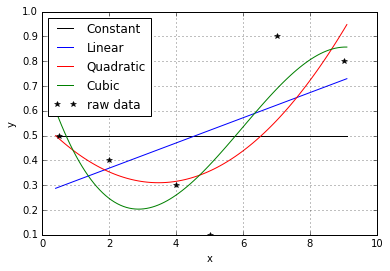

In [4]:
# Calculate coefficients of polynomial degree 0 - ie a constant value.
poly_coeffs=numpy.polyfit(x, y, 0)
# Construct a polynomial function which we can use to evaluate for arbitrary x values.
p0 = numpy.poly1d(poly_coeffs)
pylab.plot(xx, p0(xx), 'k', label='Constant')

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=numpy.polyfit(x, y, 1)
p1 = numpy.poly1d(poly_coeffs)
pylab.plot(xx, p1(xx), 'b', label='Linear')

# Quadratic
poly_coeffs=numpy.polyfit(x, y, 2)
p2 = numpy.poly1d(poly_coeffs)
pylab.plot(xx, p2(xx), 'r', label='Quadratic')

# Cubic
poly_coeffs=numpy.polyfit(x, y, 3)
p3 = numpy.poly1d(poly_coeffs)
pylab.plot(xx, p3(xx), 'g', label='Cubic')

# Overlay raw data
plot_raw_data(x, y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

### <span style="color:blue">Exercise 1.4: Squared error calculation</span>

As described in the docs ([numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)), least squares fitting minimises the square of the difference between the data provided and the polynomial,

$$E = \sum_{i=0}^{N} (p(x_i) - y_i)^2,$$

where $p(x_i)$ is the value of the polynomial function that has been fit to the data evaluated at point $x_i$, and $y_i$ is the $i^{th}$ data value.

Write a Python fucntion that evaluates the squared error, $E$, and use this function to evaluate the error for each of the polynomials calculated above. <span style="color:green">Tip: Try to pass the function *p* in as an argument to your error calculation function. One of the great features of Python is that it is easy to pass in functions as arguments.</span>

Why is the square of the difference used? 

### <span style="color:blue">Exercise 1.5: Degree of approximation </span>

Extend the example above by fitting and plotting polynomials of increasing degree past cubic. At what *degree* does the resulting polynomial approximation equate to the Lagrange interpolant?

Why does this make sense? 

<span style="color:green">Hint: think about the number of free parameters in a polynomial, and the amount of data you have.</span>

# Extrapolation

*Interpolation* by definition is used to estimate $y$ for values of $x$ within the bounds of the available data (here $[0.5,9]$) with some confidence. *Extrapolation* on the other hand is the process of estimating (e.g. using the interpolating function) $y$ *outside* the bounds of the available data. However, extrapolation requires a great deal of care as it will become increasingly inaccurate as you go further out of bounds.

### <span style="color:blue">Exercise 1.6: Extrapolation </span>

Recreate the plots in the example above for different degrees of polynomial, setting the x-range from -2.0 to 11.0. What do you notice about extrapolation when you use higher degree polynomials.

# Challenge of the day

### <span style="color:blue">Exercise 1.7: Submarine landslide size in the North Atlantic </span>

Open the data file [Length-Width.dat](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/data/Length-Width.dat) giving the lengths and widths of submarine landslides in the North Atlantic basin [from [Huhnerbach & Masson, 2004](http://www.sciencedirect.com/science/article/pii/S0025322704002774), Fig. 7].  Fit a linear best fit line using polyfit and try to recreate the image below.

<span style="color:green">Hint: You will need to take the log of the data before fitting a line to it. </span>

!["Cloud of point data for submarine landslide widths and depths in the North Atlantic, and a correspondong best (linear) curve fit."](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/images/Width-Length.png)


Reference: [V. Huhnerbach, D.G. Masson, Landslides in the North Atlantic and its adjacent seas:
an analysis of their morphology, setting and behaviour, Marine Geology 213 (2004) 343 – 362.](http://www.sciencedirect.com/science/article/pii/S0025322704002774)